### Clustering Base Stations Based on Frame Delay Variations


**Data Import and Initial Exploration**

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering ,DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples

In [18]:
df = pd.read_csv('BaseStations.csv')

In [19]:
df.head()

,Unnamed: 0,Timestamp,FrameDelayVariation,BaseStation_ID
0,0,2023-01-07 20:10:00,-0.001898,LEI9P
1,1,2023-01-01 04:15:00,0.460747,DT8XG
2,2,2023-01-01 20:50:00,-0.259304,A29XK
3,3,2023-01-04 07:40:00,0.423286,HLPOL
4,4,2023-01-05 13:55:00,-0.024141,NYWNK


In [20]:
df.tail()

,Unnamed: 0,Timestamp,FrameDelayVariation,BaseStation_ID
8063995,8063995,2023-01-03 06:10:00,1.712189,DCI7R
8063996,8063996,2023-01-03 11:50:00,0.041323,428G3
8063997,8063997,2023-01-02 10:20:00,0.415985,Q0AOO
8063998,8063998,2023-01-05 17:35:00,-2.338867,X0017
8063999,8063999,2023-01-02 19:10:00,-0.914531,256S5


In [21]:
df.shape

(8064000, 4)

In [22]:
df.head()

,Unnamed: 0,Timestamp,FrameDelayVariation,BaseStation_ID
0,0,2023-01-07 20:10:00,-0.001898,LEI9P
1,1,2023-01-01 04:15:00,0.460747,DT8XG
2,2,2023-01-01 20:50:00,-0.259304,A29XK
3,3,2023-01-04 07:40:00,0.423286,HLPOL
4,4,2023-01-05 13:55:00,-0.024141,NYWNK


In [23]:
df.isnull().sum()


Unnamed: 0             0
Timestamp              0
FrameDelayVariation    0
BaseStation_ID         0
dtype: int64

In [8]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
8063995    False
8063996    False
8063997    False
8063998    False
8063999    False
Length: 8064000, dtype: bool

In [28]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df 

,Timestamp,FrameDelayVariation,BaseStation_ID
0,2023-01-07 20:10:00,-0.001898,LEI9P
1,2023-01-01 04:15:00,0.460747,DT8XG
2,2023-01-01 20:50:00,-0.259304,A29XK
3,2023-01-04 07:40:00,0.423286,HLPOL
4,2023-01-05 13:55:00,-0.024141,NYWNK
...,...,...,...
8063995,2023-01-03 06:10:00,1.712189,DCI7R
8063996,2023-01-03 11:50:00,0.041323,428G3
8063997,2023-01-02 10:20:00,0.415985,Q0AOO
8063998,2023-01-05 17:35:00,-2.338867,X0017


In [11]:
df.describe()

,FrameDelayVariation
count,8.064000e+06
mean,7.023614e-02
std,1.027776e+00
min,-3.122696e+00
25%,-4.135341e-01
50%,3.324178e-03
75%,4.634271e-01
max,5.548705e+00


In [13]:
unique_base_stations_list = df['BaseStation_ID'].unique().tolist()
print(unique_base_stations_list)

['LEI9P', 'DT8XG', 'A29XK', 'HLPOL', 'NYWNK', '0F4VE', 'NYR36', 'ZJDSZ', 'Y1WDE', 'PE04M', 'CFEBH', 'G72LJ', '963RB', 'NSD60', 'SRPO1', 'J1XG2', 'C1LQY', 'OC78Q', 'C8XTM', 'Y2GB7', 'U4L5K', 'DHLFY', 'TDBLU', '221MM', '6PBCL', 'PTHWM', 'B4N3J', '00JXZ', 'EETW6', '3LW5E', 'D1610', '22YI7', 'I8GKU', 'TAVK1', '9BJLL', '8G2ZG', 'BJP6N', 'DS7W9', '6XHMK', '8IXKR', 'VD3EN', 'P9FPG', 'PEA2Z', '4YQCT', 'TACSC', 'YE9W3', 'ZPNU1', 'OWIEE', 'U7YZV', 'U3MSF', '7DNRK', '9U91C', 'W8C8I', 'ZYSOY', 'QY4AB', '5ZWFZ', 'FK0V8', 'NGRQQ', 'AB0RW', '4BDCV', 'TQWQT', 'AFT38', 'JRFVO', 'L8SC8', 'HOPD1', 'G0SO2', '271XQ', '8AY78', 'W7NX8', 'MJU6P', 'BQ70L', 'TYKOP', 'XBNN8', '7K3AJ', 'GSE1C', 'BBUVM', 'EHR33', 'ZQGCJ', '6UDIR', 'U2LQM', 'O01N0', 'UP2S4', 'I9K7C', 'BC51F', '24FB9', '45BOH', 'YKXF1', 'PUQEA', 'KM7KS', '70CO4', 'AGXUL', '7HN2C', 'BFAEH', 'RUGJT', '4CVEU', 'W7U0J', 'HJTY6', '3CTAA', 'AOYVH', '0HE6M', '5KFV2', 'CVXNW', 'NFHK9', 'P1FRX', 'SK3SG', 'DUF38', 'Q6SYI', 'R8PVH', '7X02A', 'WXUH6', 'XGMZ1', 

In [ ]:
unique_base_stations_count = len(df['BaseStation_ID'].unique())
print(f"Number of unique BaseStation_IDs: {unique_base_stations_count}")


Number of unique BaseStation_IDs: 3999


**Data Preprocessing**

In [9]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
skewness = df[numerical_columns].skew()


In [13]:
outliers

FrameDelayVariation    590276
dtype: int64

In [14]:
skewness

FrameDelayVariation    1.459158
dtype: float64

In [15]:
df['FrameDelayVariation_capped'] = df['FrameDelayVariation'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
df['FrameDelayVariation_log'] = df['FrameDelayVariation'].apply(lambda x: np.log(x + 1) if x >= 0 else np.log(x - df['FrameDelayVariation'].min() + 1))

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


**Base Station Selection and Resampling**

C:\Users\hamad\AppData\Local\Temp\ipykernel_2928\2556992398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Timestamp'] = pd.to_datetime(sample_data['Timestamp'])
C:\Users\hamad\AppData\Local\Temp\ipykernel_2928\2556992398.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')  # Resampling to hourly frequency


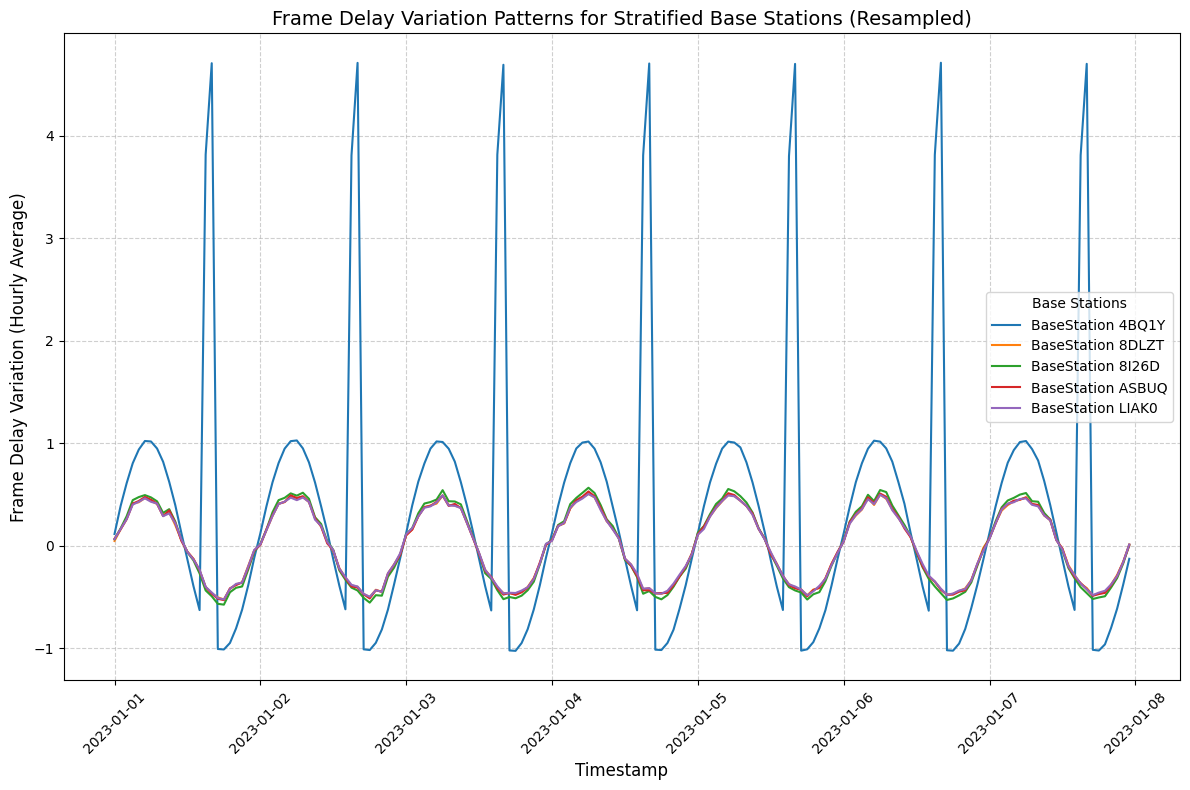

In [5]:
sample_base_stations = random.sample(list(df['BaseStation_ID'].unique()), 5)
sample_data = df[df['BaseStation_ID'].isin(sample_base_stations)]
sample_data['Timestamp'] = pd.to_datetime(sample_data['Timestamp'])
sampled_data_resampled = (
    sample_data.set_index('Timestamp')
    .groupby('BaseStation_ID')['FrameDelayVariation']
    .resample('1H') 
    .mean()
    .reset_index()
)
plt.figure(figsize=(12, 8))

unique_stations = sampled_data_resampled['BaseStation_ID'].unique()

for base_station_id in unique_stations:
    station_data = sampled_data_resampled[
        sampled_data_resampled['BaseStation_ID'] == base_station_id
    ]
    plt.plot(
        station_data['Timestamp'], 
        station_data['FrameDelayVariation'], 
        label=f'BaseStation {base_station_id}'
    )

plt.title('Frame Delay Variation Patterns for Stratified Base Stations (Resampled)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Frame Delay Variation (Hourly Average)', fontsize=12)
plt.legend(title='Base Stations', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\hamad\AppData\Local\Temp\ipykernel_12996\2556992398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Timestamp'] = pd.to_datetime(sample_data['Timestamp'])
C:\Users\hamad\AppData\Local\Temp\ipykernel_12996\2556992398.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')  # Resampling to hourly frequency


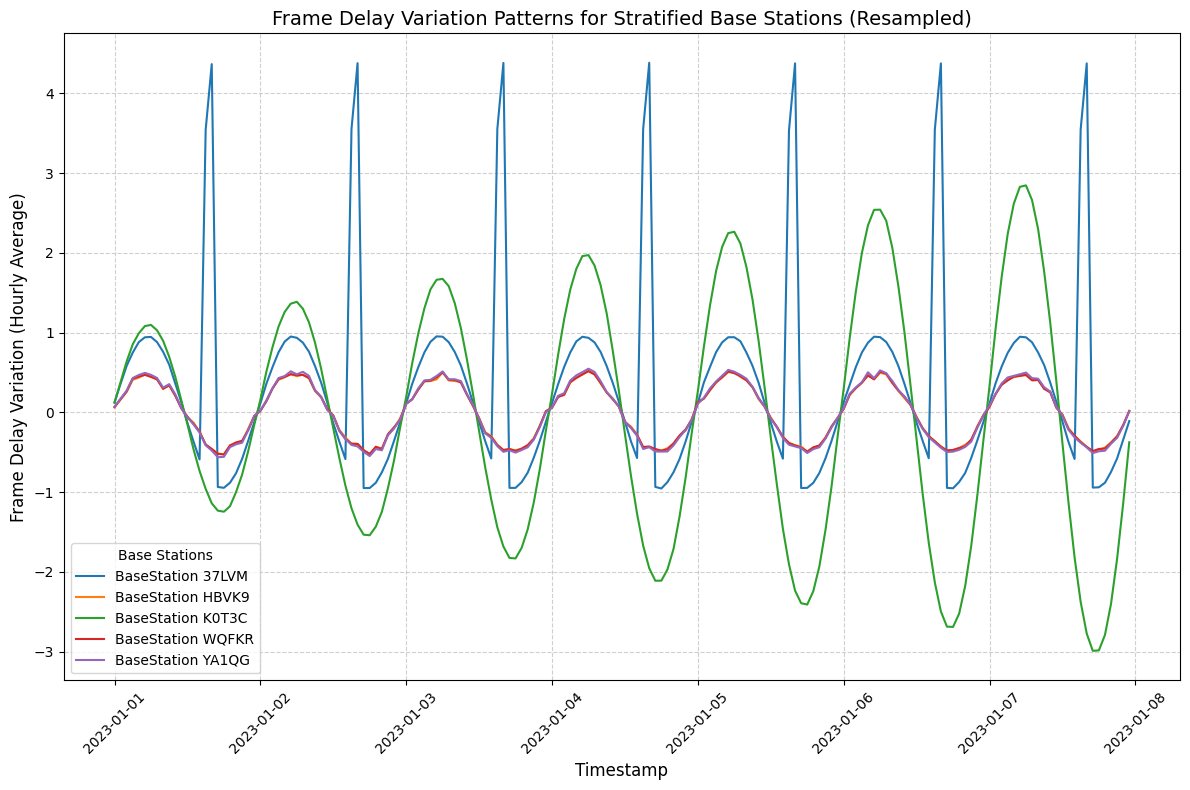

In [6]:
sample_base_stations = random.sample(list(df['BaseStation_ID'].unique()), 5)
sample_data = df[df['BaseStation_ID'].isin(sample_base_stations)]
sampled_data_resampled = (
    sample_data.set_index('Timestamp')
    .groupby('BaseStation_ID')['FrameDelayVariation']
    .resample('1H')  
    .mean()
    .reset_index()
)
plt.figure(figsize=(12, 8))
unique_stations = sampled_data_resampled['BaseStation_ID'].unique()
for base_station_id in unique_stations:
    station_data = sampled_data_resampled[
        sampled_data_resampled['BaseStation_ID'] == base_station_id
    ]
    plt.plot(
        station_data['Timestamp'], 
        station_data['FrameDelayVariation'], 
        label=f'BaseStation {base_station_id}'
    )

plt.title('Frame Delay Variation Patterns for Stratified Base Stations (Resampled)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Frame Delay Variation (Hourly Average)', fontsize=12)
plt.legend(title='Base Stations', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\hamad\AppData\Local\Temp\ipykernel_12996\2556992398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Timestamp'] = pd.to_datetime(sample_data['Timestamp'])
C:\Users\hamad\AppData\Local\Temp\ipykernel_12996\2556992398.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')  # Resampling to hourly frequency


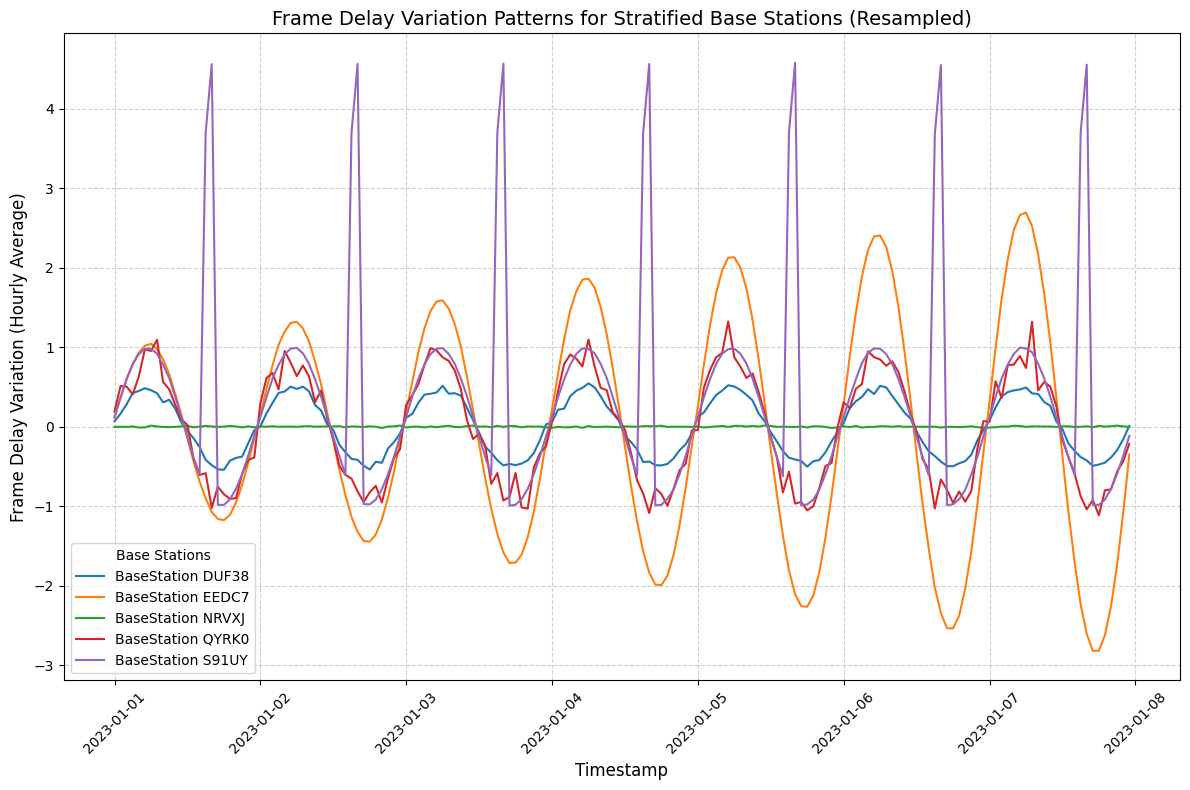

In [7]:
sample_base_stations = random.sample(list(df['BaseStation_ID'].unique()), 5)
sample_data = df[df['BaseStation_ID'].isin(sample_base_stations)]
sampled_data_resampled = (
    sample_data.set_index('Timestamp')
    .groupby('BaseStation_ID')['FrameDelayVariation']
    .resample('1H')  
    .mean()
    .reset_index()
)
plt.figure(figsize=(12, 8))

unique_stations = sampled_data_resampled['BaseStation_ID'].unique()

for base_station_id in unique_stations:
    station_data = sampled_data_resampled[
        sampled_data_resampled['BaseStation_ID'] == base_station_id
    ]
    plt.plot(
        station_data['Timestamp'], 
        station_data['FrameDelayVariation'], 
        label=f'BaseStation {base_station_id}'
    )

plt.title('Frame Delay Variation Patterns for Stratified Base Stations (Resampled)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Frame Delay Variation (Hourly Average)', fontsize=12)
plt.legend(title='Base Stations', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Feature Engineering**

In [5]:
df.sort_values(by=['BaseStation_ID', 'Timestamp'], inplace=True)

In [6]:
df['Delay_Diff'] = df.groupby('BaseStation_ID')['FrameDelayVariation'].diff()
jitter = df.groupby('BaseStation_ID')['Delay_Diff'].std().reset_index()
jitter.columns = ['BaseStation_ID', 'Jitter']

In [7]:
agg_features = df.groupby('BaseStation_ID').agg({
    'FrameDelayVariation': ['mean', 'std', 'max', 'min', 'sum']
}).reset_index()
agg_features.columns = ['BaseStation_ID', 'FrameDelay_Mean', 'FrameDelay_Std', 
                        'FrameDelay_Max', 'FrameDelay_Min', 'FrameDelay_Sum']

In [8]:
features = agg_features.merge(jitter, on='BaseStation_ID')


In [11]:
df

,Timestamp,FrameDelayVariation,BaseStation_ID,Delay_Diff
5740746,2023-01-01 00:00:00,-0.011192,007FL,NaN
4407323,2023-01-01 00:05:00,0.020807,007FL,0.031998
4929503,2023-01-01 00:10:00,0.025730,007FL,0.004924
7152788,2023-01-01 00:15:00,0.077381,007FL,0.051651
3389208,2023-01-01 00:20:00,0.079473,007FL,0.002092
...,...,...,...,...
6976265,2023-01-07 23:35:00,-0.023189,ZZRMH,-0.056208
7882964,2023-01-07 23:40:00,-0.036981,ZZRMH,-0.013792
6493557,2023-01-07 23:45:00,-0.011773,ZZRMH,0.025208
6683167,2023-01-07 23:50:00,-0.032199,ZZRMH,-0.020425


In [12]:
features['Delay_Jitter'] = features['FrameDelay_Mean'] * features['Jitter']


In [13]:
features

,BaseStation_ID,FrameDelay_Mean,FrameDelay_Std,FrameDelay_Max,FrameDelay_Min,FrameDelay_Sum,Jitter,Delay_Jitter
0,007FL,-0.045399,1.478161,2.820144,-2.970837,-91.524937,0.042958,-0.001950
1,00AKY,0.000487,0.019387,0.078172,-0.070131,0.982013,0.027154,0.000013
2,00JXZ,0.000534,0.019454,0.071275,-0.065722,1.075797,0.027638,0.000015
3,00K6O,-0.020260,0.871309,2.704200,-2.398973,-40.844838,0.713275,-0.014451
4,00Z4D,-0.043755,1.428381,2.716557,-2.875099,-88.209801,0.042410,-0.001856
...,...,...,...,...,...,...,...,...
3994,ZYSOY,-0.000600,0.019798,0.065934,-0.072983,-1.209983,0.028221,-0.000017
3995,ZYUVA,-0.019027,0.817979,2.532401,-2.253181,-38.357996,0.668796,-0.012725
3996,ZYYV9,-0.019207,0.823308,2.559111,-2.267821,-38.721976,0.673207,-0.012931
3997,ZZ4LR,-0.000647,0.020293,0.077466,-0.072954,-1.305192,0.028608,-0.000019


**Normalization of Features**

In [14]:
features_to_cluster = features.drop('BaseStation_ID', axis=1)
normalized_features = (features_to_cluster - features_to_cluster.mean()) / features_to_cluster.std()

In [15]:
normalized_features

,FrameDelay_Mean,FrameDelay_Std,FrameDelay_Max,FrameDelay_Min,FrameDelay_Sum,Jitter,Delay_Jitter
0,-0.664411,1.118653,0.277341,-1.442162,-0.664314,-0.891118,-0.473633
1,-0.400825,-1.409890,-1.232203,1.290872,-0.400741,-0.949482,-0.450669
2,-0.400558,-1.409774,-1.236001,1.295026,-0.400474,-0.947692,-0.450651
3,-0.520005,0.066775,0.213510,-0.903355,-0.519915,1.584311,-0.619841
4,-0.654965,1.032366,0.220313,-1.351958,-0.654869,-0.893141,-0.472527
...,...,...,...,...,...,...,...
3994,-0.407071,-1.409178,-1.238941,1.288184,-0.406987,-0.945541,-0.451022
3995,-0.512919,-0.025664,0.118929,-0.765990,-0.512830,1.420055,-0.599652
3996,-0.513956,-0.016427,0.133634,-0.779783,-0.513867,1.436344,-0.602055
3997,-0.407342,-1.408320,-1.232592,1.288212,-0.407258,-0.944110,-0.451040


**Elbow Method**

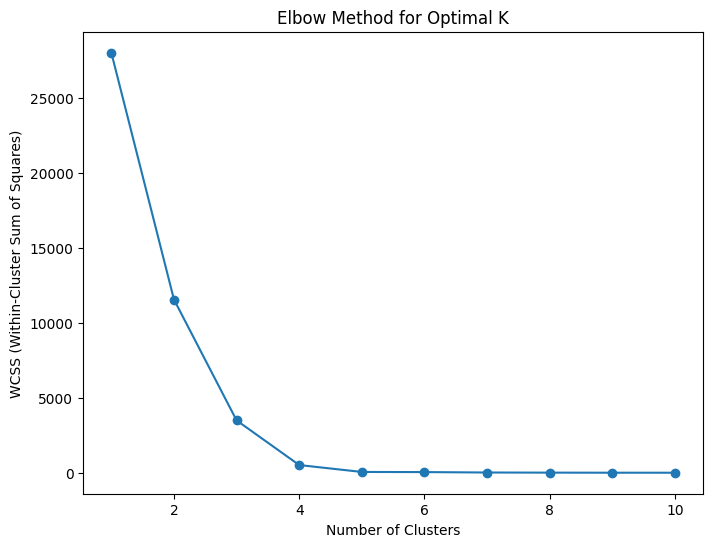

In [27]:
k_range = range(1, 11)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


**K-Means Clustering**

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(normalized_features)
features['KMeans_Cluster'] = kmeans.labels_

In [15]:
silhouette_kmeans = silhouette_score(normalized_features, features['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

K-Means Silhouette Score: 0.90247612222328


In [16]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
dbi = davies_bouldin_score(normalized_features, features['KMeans_Cluster'])
chs = calinski_harabasz_score(normalized_features, features['KMeans_Cluster'])
print(f"Davies-Bouldin Index: {dbi}")
print(f"Calinski-Harabasz Score: {chs}")


Davies-Bouldin Index: 0.172477513421692
Calinski-Harabasz Score: 70184.42754530301


**DBSCAN and Hierarchical Clustering**

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_clusters = dbscan.fit_predict(normalized_features)
features['DBSCAN_Cluster'] = dbscan_clusters

hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_clusters = hierarchical.fit_predict(normalized_features)
features['Hierarchical_Cluster'] = hierarchical_clusters


dbi_dbscan = davies_bouldin_score(normalized_features, dbscan_clusters)
chs_dbscan = calinski_harabasz_score(normalized_features, dbscan_clusters)
silhouette_dbscan = silhouette_score(normalized_features, dbscan_clusters)

dbi_hierarchical = davies_bouldin_score(normalized_features, hierarchical_clusters)
chs_hierarchical = calinski_harabasz_score(normalized_features, hierarchical_clusters)
silhouette_hierarchical = silhouette_score(normalized_features, hierarchical_clusters)

print(f"DBSCAN - Davies-Bouldin Index: {dbi_dbscan}, Calinski-Harabasz Score: {chs_dbscan}, Silhouette Score: {silhouette_dbscan}")
print(f"Hierarchical - Davies-Bouldin Index: {dbi_hierarchical}, Calinski-Harabasz Score: {chs_hierarchical}, Silhouette Score: {silhouette_hierarchical}")


DBSCAN - Davies-Bouldin Index: 0.06074337258161829, Calinski-Harabasz Score: 453387.32161660603, Silhouette Score: 0.9581474085379587
Hierarchical - Davies-Bouldin Index: 0.172477513421692, Calinski-Harabasz Score: 70184.42754530301, Silhouette Score: 0.90247612222328


**Density-Based Clustering Validation (DBCV) Index**

In [2]:
def dbcv_index(data, labels):
    clusters = [np.where(labels == cluster)[0] for cluster in set(labels) if cluster != -1]

    def intra_density(cluster_indices):
        cluster_points = data[cluster_indices]
        if len(cluster_points) < 2:
            return 0
        distances = euclidean_distances(cluster_points)
        return np.mean(distances)

    def inter_density(cluster_a_indices, cluster_b_indices):
        cluster_a_points = data[cluster_a_indices]
        cluster_b_points = data[cluster_b_indices]
        distances = euclidean_distances(cluster_a_points, cluster_b_points)
        return np.min(distances)
    density_contrasts = []
    for i, cluster_i in enumerate(clusters):
        intra = intra_density(cluster_i)
        inter_densities = [
            inter_density(cluster_i, clusters[j])
            for j in range(len(clusters)) if j != i
        ]
        inter = np.min(inter_densities) if inter_densities else 0
        density_contrasts.append(inter / (intra + 1e-10)) 
    dbcv_raw_score = np.mean(density_contrasts)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dbcv_score_scaled = scaler.fit_transform(np.array(dbcv_raw_score).reshape(-1, 1)).item()

    return dbcv_score_scaled

dbcv_score = dbcv_index(normalized_features.values, dbscan_labels)
print(f"DBCV Index: {dbcv_score}")


DBCV Index: 0.3


### DBSCAN outperforms the other two methods across all three metrics:

- **Silhouette Score**: the score of DBSCAN is the highest (0.96), showing the best-formed clusters.
- **Davies-Bouldin Index**: DBSCAN also shows the lowest value, 0.06, suggesting that its clustering is better separated.
- **Calinski-Harabasz Score**: DBSCAN's score is considerably higher, which means that the clusters are more unique and well-defined.

K-Means and Hierarchical give similar results, but DBSCAN stands out as the best for this dataset, especially in handling density-based clustering.


### **DBCV Index**: 0.3
A score of 0.3 indicates good clustering structure and quality, indicating well-separated, dense clusters with minimal noise, particularly in density-based clustering like DBSCAN.

DBSCAN outperforms K-Means and Hierarchical in most metrics, particularly in Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Score, and  DBCV Index, making it the most effective data clustering algorithm.

K-Means and Hierarchical show similar performance in some metrics, with K-Means slightly better in Silhouette Score and Davies-Bouldin Index but significantly worse on the Calinski-Harabasz Score.
- But Kmeans is the slightly the best because it is efficient with large dataset and it perfom good 


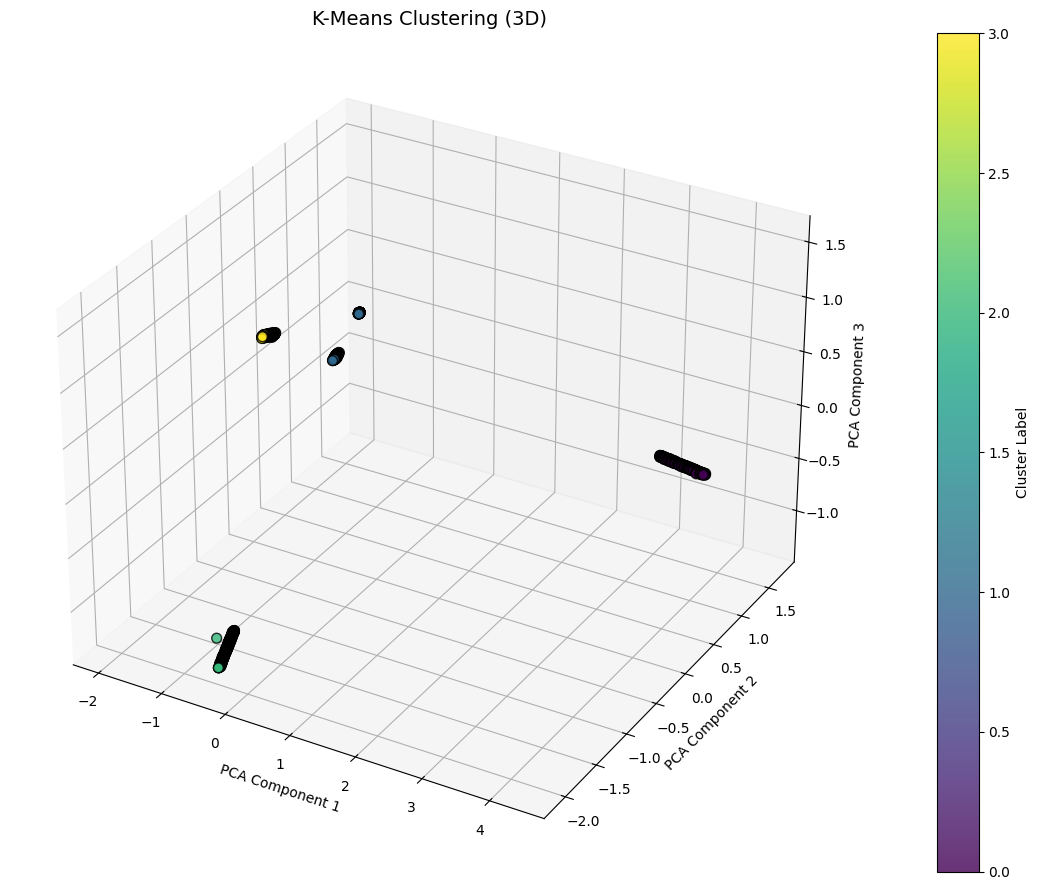

In [26]:
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(normalized_features)
kmeans = KMeans(n_clusters=4) 
kmeans_clusters = kmeans.fit_predict(normalized_features)
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(reduced_features_3d[:, 0], 
                        reduced_features_3d[:, 1], 
                        reduced_features_3d[:, 2], 
                        c=kmeans_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')
ax1.set_title("K-Means Clustering (3D)", fontsize=14)
ax1.set_xlabel('PCA Component 1', fontsize=10)
ax1.set_ylabel('PCA Component 2', fontsize=10)
ax1.set_zlabel('PCA Component 3', fontsize=10)
fig.colorbar(scatter1, ax=ax1, label='Cluster Label')
plt.tight_layout()
plt.show()


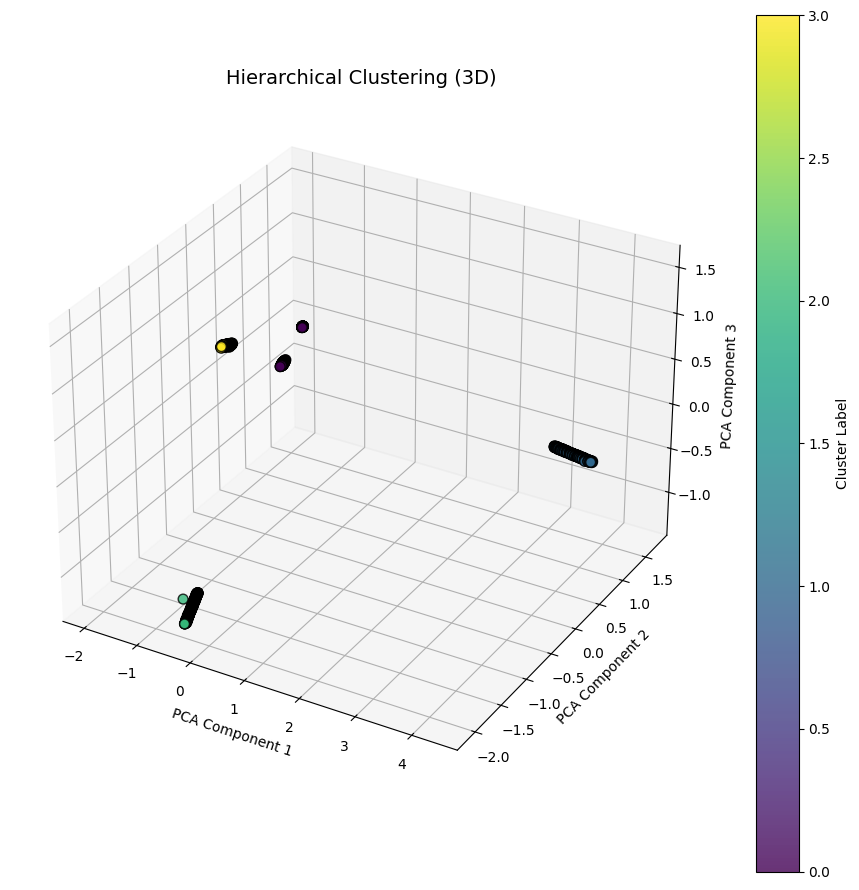

In [35]:
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(normalized_features)
fig = plt.figure(figsize=(18, 9))

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(reduced_features_3d[:, 0], 
                        reduced_features_3d[:, 1], 
                        reduced_features_3d[:, 2], 
                        c=hierarchical_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')
ax2.set_title("Hierarchical Clustering (3D)", fontsize=14)
ax2.set_xlabel('PCA Component 1', fontsize=10)
ax2.set_ylabel('PCA Component 2', fontsize=10)
ax2.set_zlabel('PCA Component 3', fontsize=10)
fig.colorbar(scatter2, ax=ax2, label='Cluster Label')
plt.tight_layout()
plt.show()


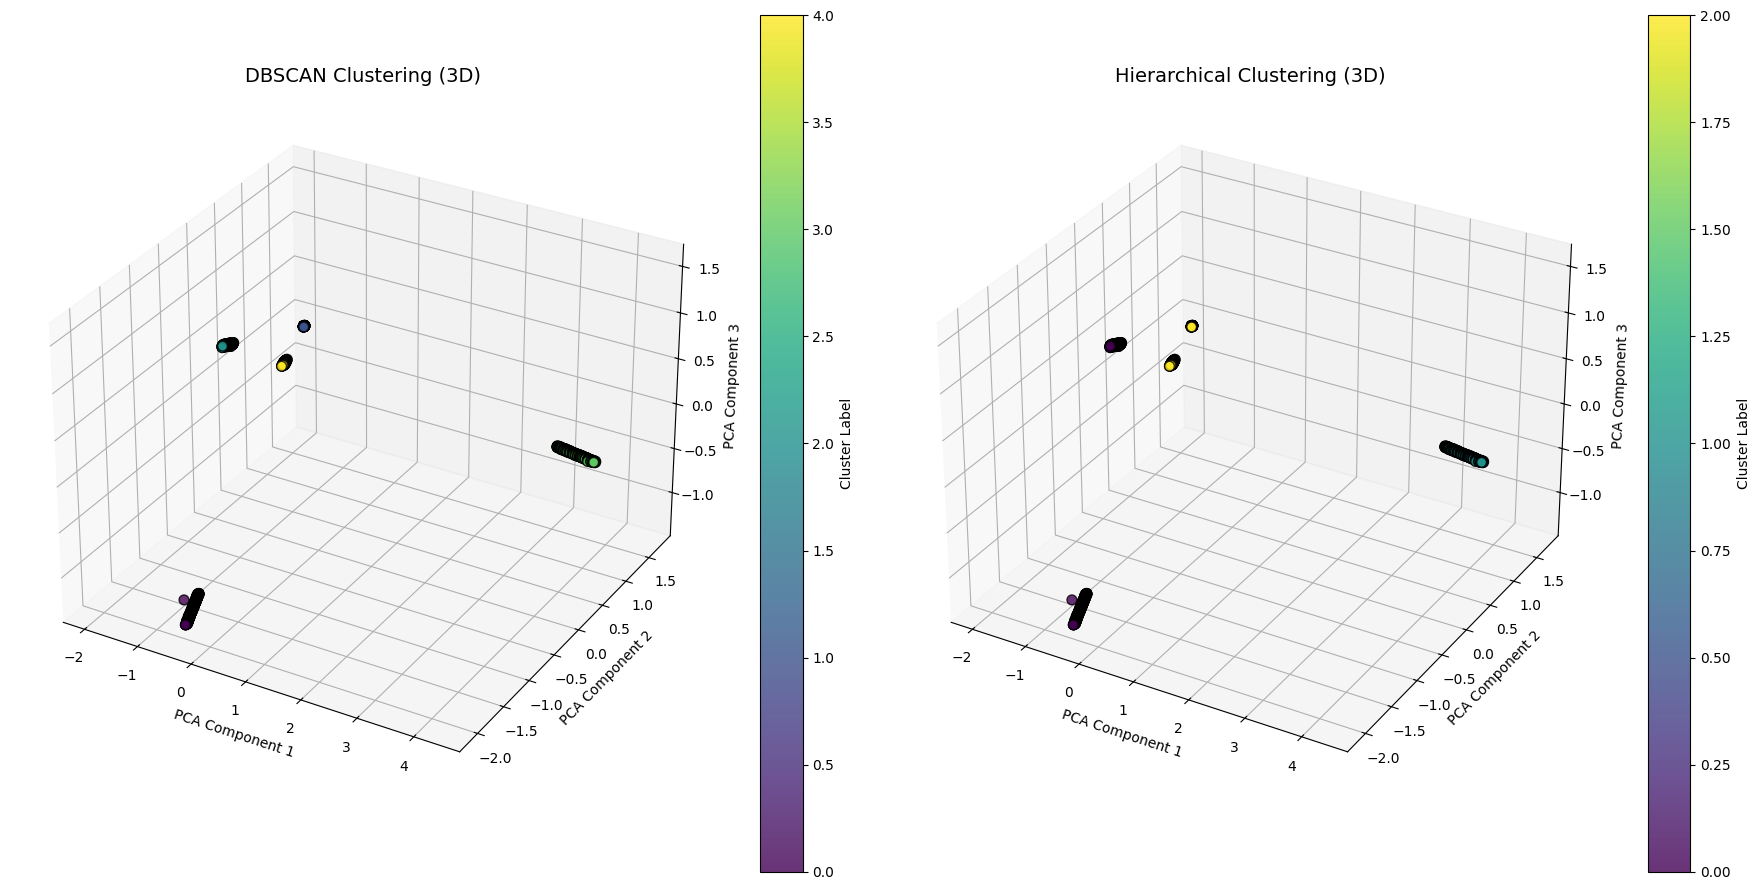

In [20]:
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(normalized_features)
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(reduced_features_3d[:, 0], 
                        reduced_features_3d[:, 1], 
                        reduced_features_3d[:, 2], 
                        c=dbscan_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')
ax1.set_title("DBSCAN Clustering (3D)", fontsize=14)
ax1.set_xlabel('PCA Component 1', fontsize=10)
ax1.set_ylabel('PCA Component 2', fontsize=10)
ax1.set_zlabel('PCA Component 3', fontsize=10)
fig.colorbar(scatter1, ax=ax1, label='Cluster Label')
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(reduced_features_3d[:, 0], 
                        reduced_features_3d[:, 1], 
                        reduced_features_3d[:, 2], 
                        c=hierarchical_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')
ax2.set_title("Hierarchical Clustering (3D)", fontsize=14)
ax2.set_xlabel('PCA Component 1', fontsize=10)
ax2.set_ylabel('PCA Component 2', fontsize=10)
ax2.set_zlabel('PCA Component 3', fontsize=10)
fig.colorbar(scatter2, ax=ax2, label='Cluster Label')

plt.tight_layout()
plt.show()


## Are the base stations within each cluster similar in terms of their delay variation patterns?

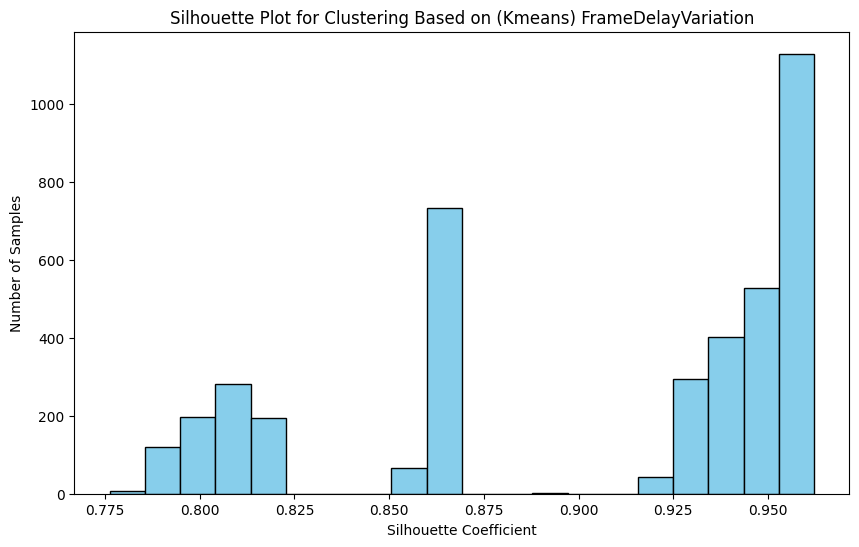

In [34]:
silhouette_vals = silhouette_samples(normalized_features, features['KMeans_Cluster'])
plt.figure(figsize=(10, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black', color='skyblue')
plt.title('Silhouette Plot for Clustering Based on (Kmeans) FrameDelayVariation')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Number of Samples')
plt.show()

- The presence of peaks around 0.850 and 0.950 suggests that most samples are well-clustered with high silhouette coefficients, indicating good clustering performance.

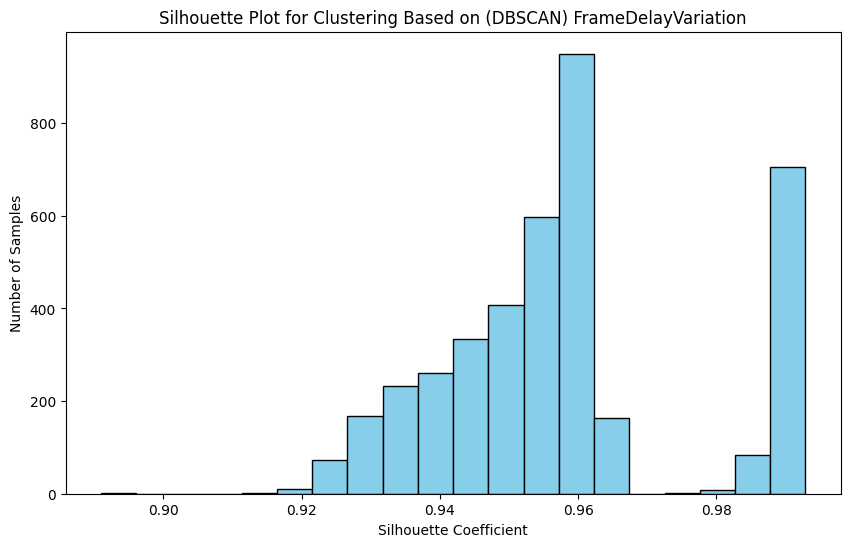

In [33]:
silhouette_vals = silhouette_samples(normalized_features, features['DBSCAN_Cluster'])
plt.figure(figsize=(10, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black', color='skyblue')
plt.title('Silhouette Plot for Clustering Based on (DBSCAN) FrameDelayVariation')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Number of Samples')
plt.show()

- The peak at around 0.96 indicates that the clustering algorithm has performed well, with most points being well-clustered.

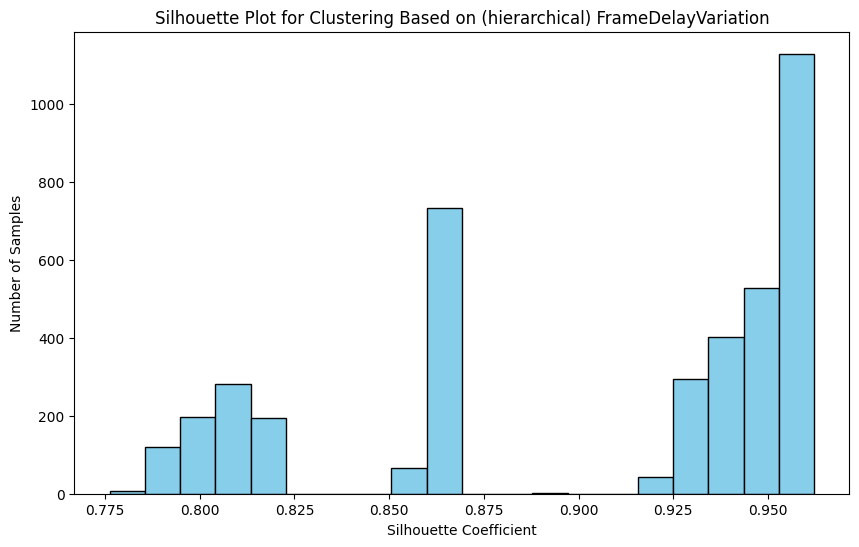

In [32]:
silhouette_vals = silhouette_samples(normalized_features,features['hierarchical_Cluster'] )
plt.figure(figsize=(10, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black', color='skyblue')
plt.title('Silhouette Plot for Clustering Based on (hierarchical) FrameDelayVariation')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Number of Samples')
plt.show()

- The presence of peaks around 0.850 and 0.950 suggests that most samples are well-clustered with high silhouette coefficients, indicating good clustering performance.

C:\Users\hamad\AppData\Local\Temp\ipykernel_2928\794906544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Mean', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_2928\794906544.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Std', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_2928\794906544.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Max', data=features, palette='Set1'

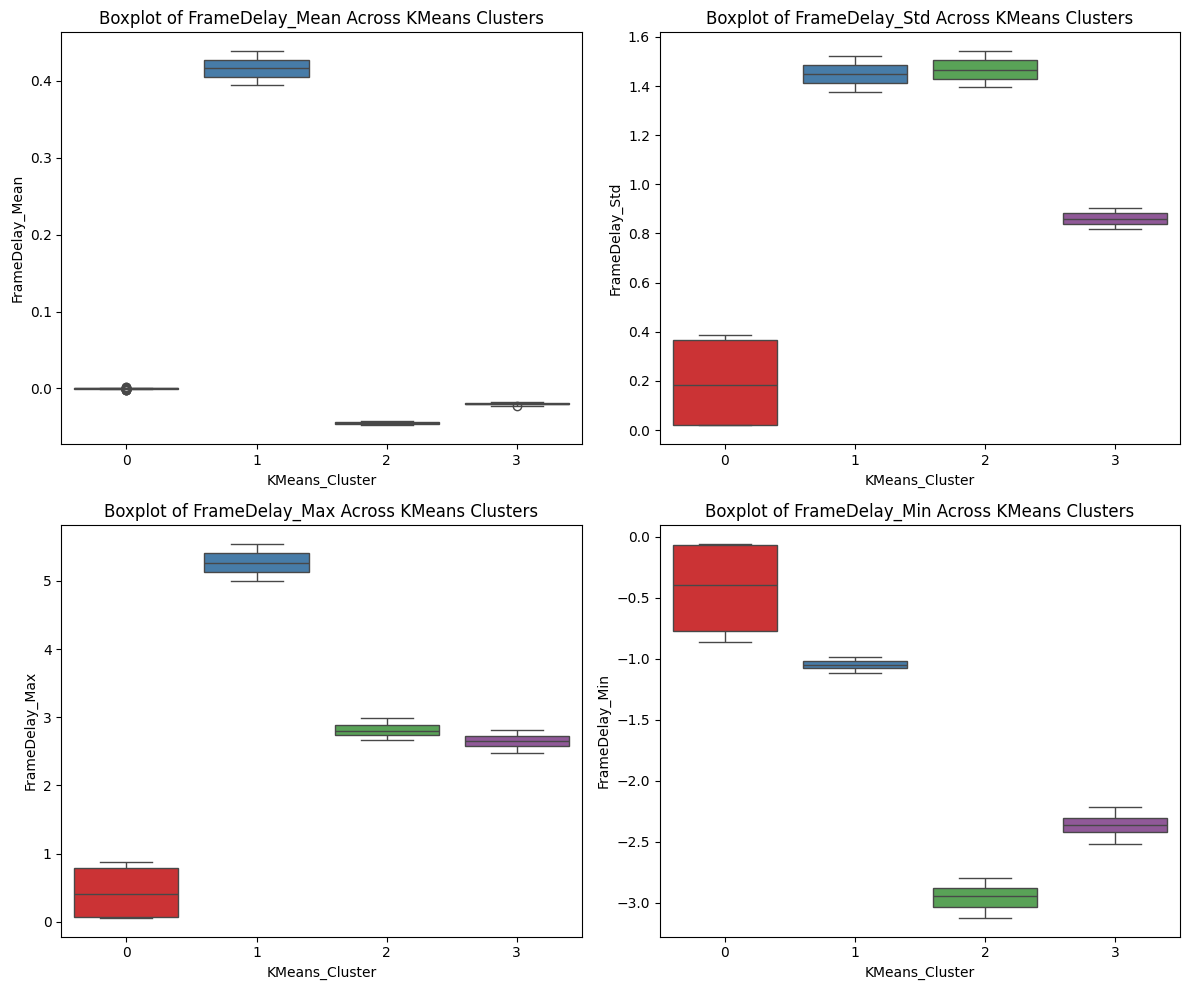

In [48]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Mean', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Mean Across KMeans Clusters')
plt.subplot(2, 2, 2)
sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Std', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Std Across KMeans Clusters')
plt.subplot(2, 2, 3)
sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Max', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Max Across KMeans Clusters')
plt.subplot(2, 2, 4)
sns.boxplot(x='KMeans_Cluster', y='FrameDelay_Min', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Min Across KMeans Clusters')
plt.tight_layout()
plt.show()

C:\Users\hamad\AppData\Local\Temp\ipykernel_11268\2216678912.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dbscan_clusters, y='FrameDelay_Mean', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_11268\2216678912.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dbscan_clusters, y='FrameDelay_Std', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_11268\2216678912.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dbscan_clusters, y='FrameDelay_Max', data=features, palette='Se

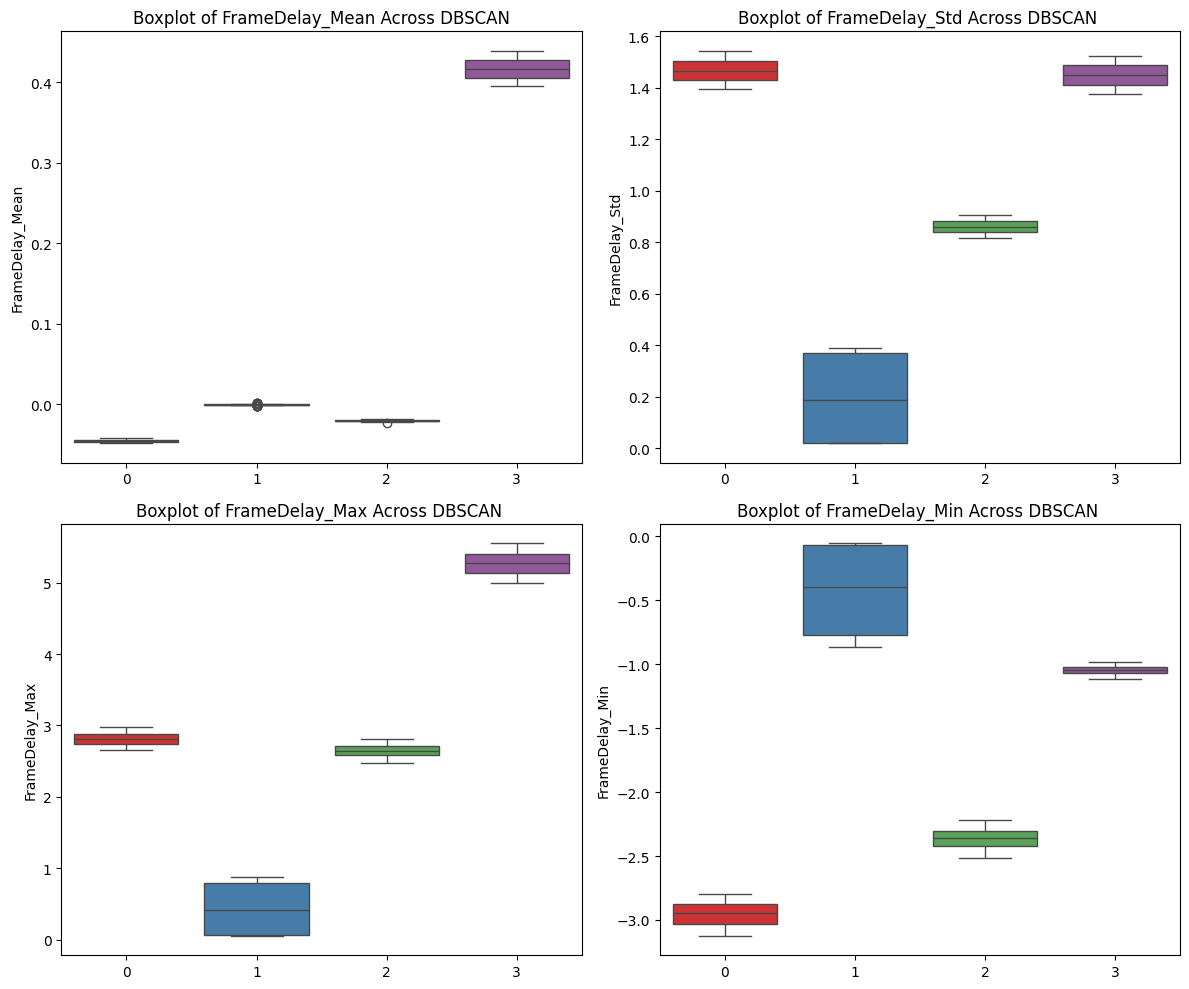

In [21]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=dbscan_clusters, y='FrameDelay_Mean', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Mean Across DBSCAN')
plt.subplot(2, 2, 2)
sns.boxplot(x=dbscan_clusters, y='FrameDelay_Std', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Std Across DBSCAN ')
plt.subplot(2, 2, 3)
sns.boxplot(x=dbscan_clusters, y='FrameDelay_Max', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Max Across DBSCAN ')
plt.subplot(2, 2, 4)
sns.boxplot(x=dbscan_clusters, y='FrameDelay_Min', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Min Across DBSCAN ')
plt.tight_layout()
plt.show()

C:\Users\hamad\AppData\Local\Temp\ipykernel_18000\2316970476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Mean', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_18000\2316970476.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Std', data=features, palette='Set1')
C:\Users\hamad\AppData\Local\Temp\ipykernel_18000\2316970476.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Max', data=fea

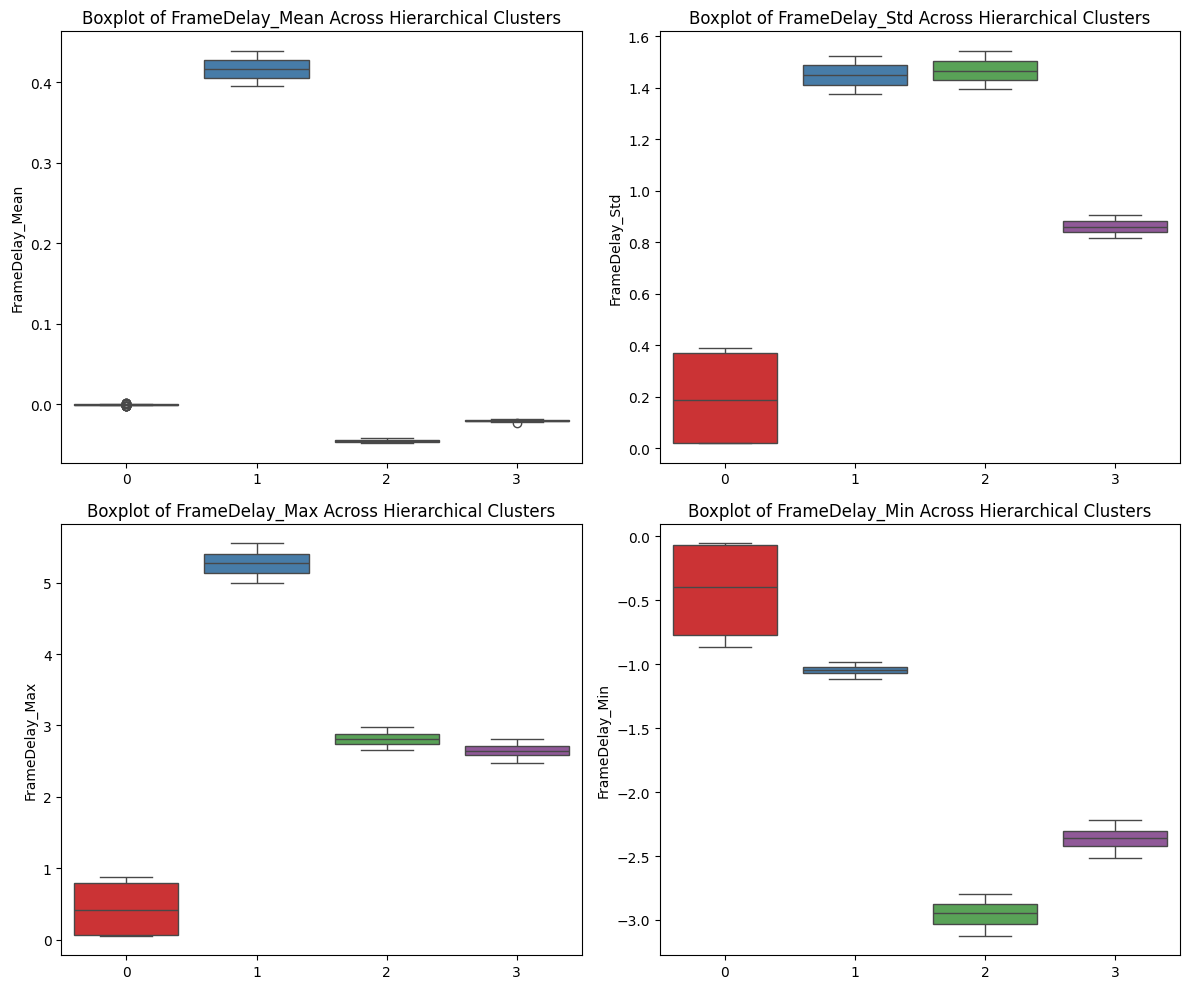

In [61]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Mean', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Mean Across Hierarchical Clusters')
plt.subplot(2, 2, 2)
sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Std', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Std Across Hierarchical Clusters')
plt.subplot(2, 2, 3)
sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Max', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Max Across Hierarchical Clusters')
plt.subplot(2, 2, 4)
sns.boxplot(x=hierarchical_clusters, y='FrameDelay_Min', data=features, palette='Set1')
plt.title('Boxplot of FrameDelay_Min Across Hierarchical Clusters')
plt.tight_layout()
plt.show()

In [25]:
cluster_summary = features.groupby('KMeans_Cluster')[['FrameDelay_Mean', 'FrameDelay_Std', 'FrameDelay_Max', 'FrameDelay_Min']].agg(['mean', 'std'])
cluster_summary

FrameDelay_Mean           FrameDelay_Std            \
                          mean       std           mean       std   
KMeans_Cluster                                                      
0                    -0.000065  0.000455       0.194038  0.174251   
1                     0.416582  0.012201       1.448801  0.042363   
2                    -0.045124  0.001363       1.467317  0.043471   
3                    -0.020148  0.000752       0.860525  0.025152   

               FrameDelay_Max           FrameDelay_Min            
                         mean       std           mean       std  
KMeans_Cluster                                                    
0                    0.428416  0.360258      -0.420732  0.353265  
1                    5.267699  0.153320      -1.047282  0.030672  
2                    2.810620  0.083123      -2.952666  0.087814  
3                    2.647344  0.079643      -2.361467  0.070731

#### In Kmeans Clusters

1. **FrameDelay_Mean**: Clusters 1  have positive mean delay values, whereas the means for Clusters 0 ,3,and 2 are negative. Cluster 1 has the highest mean value of 0.416582, showing a significantly higher average delay compared to Cluster 0, which has an almost zero mean, indicating minimal average delay.

2. **FrameDelay_Std** : The least dispersion describes Cluster 0 (0.194038), hence consistent behavior. In turn, Cluster 1, Cluster 2, and Cluster 3 are more dispersed, showing greater variability in the pattern of delay.

3. **FrameDelay_Max** : Cluster 1 presents the highest maximum value for delay (5.267699), reflecting extreme conditions for performance. For Cluster 2 and Cluster 3, it is a high value but moderate compared to Cluster 1. In turn, Cluster 0 presents the lowest maximum delay, supporting the idea of stability.

4. **FrameDelay_min** : The minimum delay for Cluster 2 is the lowest (-2.952666), followed by that of Cluster 3 at -2.361467, while that of Cluster 1 was less extreme in its negative value at -1.047282; Cluster 0 had the least negative value at -0.420732, reflecting less variability across the cluster.



The clustering effectively groups base stations with similar delay variation patterns, with Cluster 0 representing static, low-delay stations and Clusters 1, 2, and 3 presenting more variability and extremes for Kmeans Clusters.


In [26]:
cluster_summary = features.groupby('DBSCAN_Cluster')[['FrameDelay_Mean', 'FrameDelay_Std', 'FrameDelay_Max', 'FrameDelay_Min']].agg(['mean', 'std'])
cluster_summary

FrameDelay_Mean           FrameDelay_Std            \
                          mean       std           mean       std   
DBSCAN_Cluster                                                      
0                    -0.045124  0.001363       1.467317  0.043471   
1                     0.000009  0.000445       0.020006  0.000323   
2                    -0.020148  0.000752       0.860525  0.025152   
3                     0.416582  0.012201       1.448801  0.042363   
4                    -0.000139  0.000453       0.368069  0.010734   

               FrameDelay_Max           FrameDelay_Min            
                         mean       std           mean       std  
DBSCAN_Cluster                                                    
0                    2.810620  0.083123      -2.952666  0.087814  
1                    0.068887  0.006471      -0.068170  0.006461  
2                    2.647344  0.079643      -2.361467  0.070731  
3                    5.267699  0.153320      -1.047282  0.030672  
4                    0.787944  0.029125      -0.773295  0.028207

#### In DBSCAN Clusters

1. **FrameDelay_Mean** :  Cluster 3 has the highest value at 0.416582, showing higher average delays. Whereas Cluster 0, 2, and 4 have negative or near zero mean, describing lower average delay patterns.

2. **FrameDelay_Std** : Cluster 1 has very low variability, 0.020006, which suggests very stable behavior. Clusters 0 and 3 have higher variability.

3. **FrameDelay_Max** : Cluster 3 has the highest maximum delay, 5.267699, representing stations with extreme delay conditions. Cluster 0 and 2 follow in moderation for maximum values, while Cluster 1 has the lowest, 0.068887, which highlights consistent performance.

4. **FrameDelay_min** : For the minimum delay, Cluster 0 has the most negative (-2.952666), reflecting extreme conditions, whereas Cluster 1 has a higher minimum (-0.068170), confirming stability. Notable extremes can also be seen in Cluster 3 at -1.047282.

DBSCAN identifies clusters with individual delay characteristics, such as highly stable clusters with minimum variability, extreme outliers showing extreme delay conditions, and other intermediate clusters with intermediate behaviors, showing its ability in the grouping of base stations.


In [27]:
cluster_summary = features.groupby('hierarchical_Cluster')[['FrameDelay_Mean', 'FrameDelay_Std', 'FrameDelay_Max', 'FrameDelay_Min']].agg(['mean', 'std'])
cluster_summary

FrameDelay_Mean           FrameDelay_Std            \
                                mean       std           mean       std   
hierarchical_Cluster                                                      
0                          -0.000065  0.000455       0.194038  0.174251   
1                           0.416582  0.012201       1.448801  0.042363   
2                          -0.045124  0.001363       1.467317  0.043471   
3                          -0.020148  0.000752       0.860525  0.025152   

                     FrameDelay_Max           FrameDelay_Min            
                               mean       std           mean       std  
hierarchical_Cluster                                                    
0                          0.428416  0.360258      -0.420732  0.353265  
1                          5.267699  0.153320      -1.047282  0.030672  
2                          2.810620  0.083123      -2.952666  0.087814  
3                          2.647344  0.079643      -2.361467  0.070731

#### In Hierarchical Clusters

1. **FrameDelay_Mean**: The mean value of frame delay in clusters 0, 1, 2, and 3 is different, showing that base stations within each cluster share similar patterns in average delay. Cluster 0 is different in this respect, with a much lower mean compared to the others.

2. **FrameDelay_Std**: Delay variability differs much between the clusters. For instance, Cluster 0 has lower variability, while others have higher, relatively similar variability.

3. **FrameDelay_Max and Min**: Maximum and minimum delays also show clear differentiation across clusters, again suggesting that base stations in a cluster experience consistent extremes in the patterns of delay.

These differences suggest that the clustering effectively groups base stations with similar delay variation behaviors for Hierarchical Clusters.

***Insights***

- DBSCAN is ideal if identifying anomalies (extreme delays) or highly stable groups is critical, as it effectively detects clusters with unique characteristics, such as stable low-delay groups  and extreme outliers .

- KMeans provides a balanced grouping of base stations with varied delay patterns, useful for general segmentation. Cluster 0 is particularly significant for identifying consistently low-delay stations.

- Hierarchical Clustering gives insight into patterns and similarities among stations with distinct delay variation behaviors.